In [1]:
import random
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.labelsize"] = 15
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Bar, Pie, Scatter, HeatMap
from windrose import WindroseAxes

D:\Anaconda\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
D:\Anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\Anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\Anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  return lambda func: addendum(docstring.c

In [2]:
df = pd.read_excel(r'E:\dataSciProject\lianjia_hz\new\lz_hangzhou_new_copy.xlsx')

In [3]:
df.head(10)

,position,Layout,Size,Direction,Renovation,Floor,Structure,totalPrice,unitPrice,Follow,District
0,彩虹城,4室2厅,148.16平米,南,精装,中楼层(共6层),板楼,600.0,单价40497元/平米,3人关注,滨江区
1,彩虹城,4室2厅,132.02平米,东 南 北,精装,中楼层(共5层),板楼,648.0,单价49084元/平米,9人关注,滨江区
2,奥体,4室2厅,138.85平米,南 北,精装,中楼层(共33层),板楼,810.0,单价58337元/平米,26人关注,滨江区
3,浦沿,2室2厅,83.48平米,南,精装,中楼层(共32层),板楼,340.0,单价40729元/平米,12人关注,滨江区
4,长河,3室2厅,134.38平米,南 北,精装,中楼层(共9层),板楼,560.0,单价41673元/平米,208人关注,滨江区
5,浦沿,2室2厅,72.62平米,南,精装,低楼层(共14层),板塔结合,210.0,单价28918元/平米,14人关注,滨江区
6,滨江区政府,3室2厅,119.29平米,南,精装,高楼层(共30层),板楼,560.0,单价46945元/平米,4人关注,滨江区
7,滨江区政府,4室2厅,157.02平米,南,简装,高楼层(共19层),板楼,660.0,单价42033元/平米,89人关注,滨江区
8,长河,3室2厅,119.16平米,南 西,精装,中楼层(共26层),塔楼,555.0,单价46577元/平米,122人关注,滨江区
9,西兴,3室2厅,116.44平米,南,精装,高楼层(共6层),板楼,343.0,单价29458元/平米,101人关注,滨江区


In [4]:
df.isnull().sum().sort_values()

position      0
Layout        0
Size          0
Direction     0
Renovation    0
Floor         0
Structure     0
totalPrice    0
unitPrice     0
Follow        0
District      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31230 entries, 0 to 31229
Data columns (total 11 columns):
position      31230 non-null object
Layout        31230 non-null object
Size          31230 non-null object
Direction     31230 non-null object
Renovation    31230 non-null object
Floor         31230 non-null object
Structure     31230 non-null object
totalPrice    31230 non-null float64
unitPrice     31230 non-null object
Follow        31230 non-null object
District      31230 non-null object
dtypes: float64(1), object(10)
memory usage: 2.6+ MB


In [6]:
df['unitPrice'] = df['unitPrice'].apply(lambda x: str(x)).str.findall("(\d+)").str[0].astype("float")

In [7]:
df.head()

,position,Layout,Size,Direction,Renovation,Floor,Structure,totalPrice,unitPrice,Follow,District
0,彩虹城,4室2厅,148.16平米,南,精装,中楼层(共6层),板楼,600.0,40497.0,3人关注,滨江区
1,彩虹城,4室2厅,132.02平米,东 南 北,精装,中楼层(共5层),板楼,648.0,49084.0,9人关注,滨江区
2,奥体,4室2厅,138.85平米,南 北,精装,中楼层(共33层),板楼,810.0,58337.0,26人关注,滨江区
3,浦沿,2室2厅,83.48平米,南,精装,中楼层(共32层),板楼,340.0,40729.0,12人关注,滨江区
4,长河,3室2厅,134.38平米,南 北,精装,中楼层(共9层),板楼,560.0,41673.0,208人关注,滨江区


In [8]:
# df['Floor'].str.split('(').str[0]
df.shape[0]-df['Floor'].str.contains('\(').sum()

1741

In [9]:
df = df.loc[df['Floor'].str.contains('\(')]

In [10]:
# df['Floor'].str.split('(').str[0]
# df['Floor'].str.split('(').str[1].str.findall('\d+').str[0].astype('int')
df['floorType'] =  df['Floor'].str.split('(').str[0]
df['totalFloor'] = df['Floor'].str.split('(').str[1].str.findall('\d+').str[0].astype('int')

In [11]:
df.drop('Floor', axis=1, inplace=True)

In [12]:
df.head()

,position,Layout,Size,Direction,Renovation,Structure,totalPrice,unitPrice,Follow,District,floorType,totalFloor
0,彩虹城,4室2厅,148.16平米,南,精装,板楼,600.0,40497.0,3人关注,滨江区,中楼层,6
1,彩虹城,4室2厅,132.02平米,东 南 北,精装,板楼,648.0,49084.0,9人关注,滨江区,中楼层,5
2,奥体,4室2厅,138.85平米,南 北,精装,板楼,810.0,58337.0,26人关注,滨江区,中楼层,33
3,浦沿,2室2厅,83.48平米,南,精装,板楼,340.0,40729.0,12人关注,滨江区,中楼层,32
4,长河,3室2厅,134.38平米,南 北,精装,板楼,560.0,41673.0,208人关注,滨江区,中楼层,9


In [13]:
df['Structure'].unique()

array([' 板楼', ' 板塔结合', ' 塔楼', ' 暂无数据'], dtype=object)

In [14]:
df['Structure'] = df['Structure'].str.strip()

In [15]:
df['Structure'].unique()

array(['板楼', '板塔结合', '塔楼', '暂无数据'], dtype=object)

In [16]:
df = df[df['Structure'] != '暂无数据']

In [17]:
df['Renovation'].unique()

array([' 精装 ', ' 简装 ', ' 毛坯 '], dtype=object)

In [18]:
def reno(x):
    if '精装' in x: return '精装'
    if '简装' in x: return '简装'
    if '毛坯' in x: return '毛坯'
    else: return '其他'

In [19]:
df['Renovation'] = df['Renovation'].apply(reno)

In [20]:
df.head()

,position,Layout,Size,Direction,Renovation,Structure,totalPrice,unitPrice,Follow,District,floorType,totalFloor
0,彩虹城,4室2厅,148.16平米,南,精装,板楼,600.0,40497.0,3人关注,滨江区,中楼层,6
1,彩虹城,4室2厅,132.02平米,东 南 北,精装,板楼,648.0,49084.0,9人关注,滨江区,中楼层,5
2,奥体,4室2厅,138.85平米,南 北,精装,板楼,810.0,58337.0,26人关注,滨江区,中楼层,33
3,浦沿,2室2厅,83.48平米,南,精装,板楼,340.0,40729.0,12人关注,滨江区,中楼层,32
4,长河,3室2厅,134.38平米,南 北,精装,板楼,560.0,41673.0,208人关注,滨江区,中楼层,9


In [21]:
def direct(x):
    if "东南" in x:
        if x.count("南") > 1:
            if ("西南" in x) & ("南" not in x):
                return "东南"
            else:
                return "南"
        else:
            return "东南"
    elif "西南" in x:
        if x.count("南") >1:
            return "南"
        else:
            return "西南"
    elif "东北" in x:
        return "东北"
    elif "西北" in x:
        return "西北"
    elif "东" in x:
        return "东"
    elif "西" in x:
        return "西"
    elif "南" in x:
        return "南"
    elif "北" in x:
        return "北"

In [22]:
df['Orientation'] = df['Direction'].apply(direct)

In [23]:
df.drop('Direction', axis=1, inplace=True)

In [24]:
df['Orientation'].unique()

array(['南', '东', '西', '东南', '西南', '北', '西北'], dtype=object)

In [25]:
df['Size'] = df['Size'].str.findall('[\d,.]+').str[0].astype('float')

In [26]:
df['Layout'].unique()

array(['4室2厅 ', '2室2厅 ', '3室2厅 ', '3室1厅 ', '5室2厅 ', '2室1厅 ', '4室1厅 ',
       '1室1厅 ', '6室2厅 ', '1室2厅 ', '1室0厅 ', '2室0厅 ', '5室1厅 '], dtype=object)

In [27]:
df['Room'] = df['Layout'].str.findall('(\d)室(\d)厅').str[0].str[0].astype('int')
df['Hall'] = df['Layout'].str.findall('(\d)室(\d)厅').str[0].str[1].astype('int')

In [28]:
df.drop('Layout', axis=1, inplace=True)

In [29]:
# df.loc[(df['totalPrice'] > 50) & (df['totalPrice'] < 3000)]
df['Follow'] = df['Follow'].str.findall('\d+').str[0].astype('int')

In [30]:
df.describe()

,Size,totalPrice,unitPrice,Follow,totalFloor,Room,Hall
count,29307.000000,29307.00000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000
mean,93.996487,354.65585,37671.471389,34.930938,17.810045,2.741905,1.657829
std,34.299965,217.04990,14739.984585,50.298791,9.501176,0.770005,0.488617
min,31.390000,89.00000,9448.000000,0.000000,2.000000,1.000000,0.000000
25%,72.010000,209.00000,26316.000000,7.000000,8.000000,2.000000,1.000000
50%,88.640000,285.00000,37660.000000,15.000000,17.000000,3.000000,2.000000
75%,110.970000,435.00000,46221.000000,40.000000,26.000000,3.000000,2.000000
max,258.370000,1490.00000,106098.000000,347.000000,43.000000,6.000000,2.000000


### 数据可视化

####  相关性探索

In [31]:
corr = df.corr()

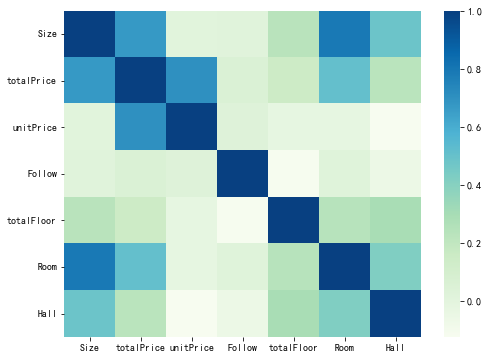

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='GnBu')
plt.show()

#### 杭州市各区房源平均总价对比

In [33]:
total_district = df.groupby('District')['totalPrice'].mean().sort_values(ascending=False).reset_index()

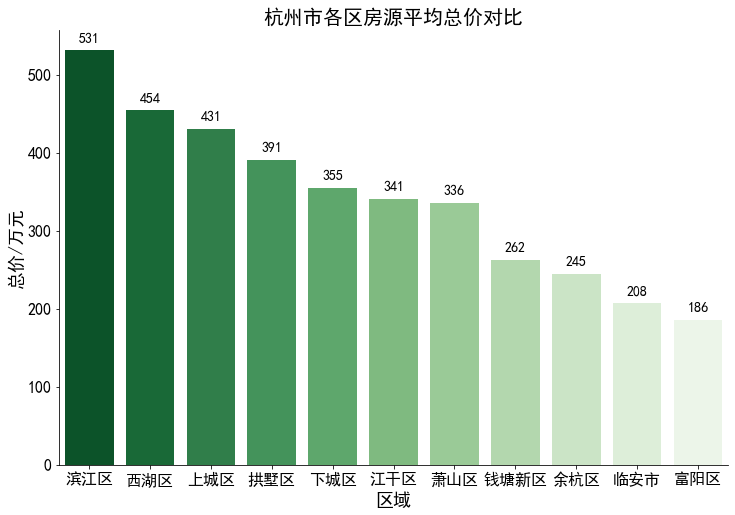

In [34]:
plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)
ax = sns.barplot(x='District', y='totalPrice', data=total_district, palette='Greens_r')
ax.set_title('杭州市各区房源平均总价对比', fontsize=20)
ax.set_xlabel('区域', fontsize=18)
ax.set_ylabel('总价/万元', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for index, row in total_district.iterrows():
    ax.text(row.name,row.totalPrice+10, round(row.totalPrice), ha='center', fontsize=14)

In [35]:
pair1 = [(row["District"], round(row["totalPrice"],2)) for i, row in total_district.iterrows()]

In [36]:
pair1

[('滨江区', 531.23),
 ('西湖区', 454.3),
 ('上城区', 430.67),
 ('拱墅区', 390.77),
 ('下城区', 355.07),
 ('江干区', 340.98),
 ('萧山区', 335.73),
 ('钱塘新区', 262.48),
 ('余杭区', 244.71),
 ('临安市', 207.55),
 ('富阳区', 185.63)]

In [37]:
map1 = Map(init_opts=opts.InitOpts(theme='macarons', width='800px', height='300px'))

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [38]:
map1.add('杭州', pair1, '杭州',is_roam=False)

In [39]:
map1.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map1.set_global_opts(
            title_opts= opts.TitleOpts(title='杭州各区域房源平均总价对比'),
            legend_opts=opts.LegendOpts(is_show=False),
            visualmap_opts=opts.VisualMapOpts(min_=round(total_district['totalPrice'].min()), max_=round(total_district['totalPrice'].max())),
            tooltip_opts=opts.TooltipOpts(formatter='{b}:{c}万元')
)
map1.render_notebook()

In [40]:
locations = df['District'].unique()

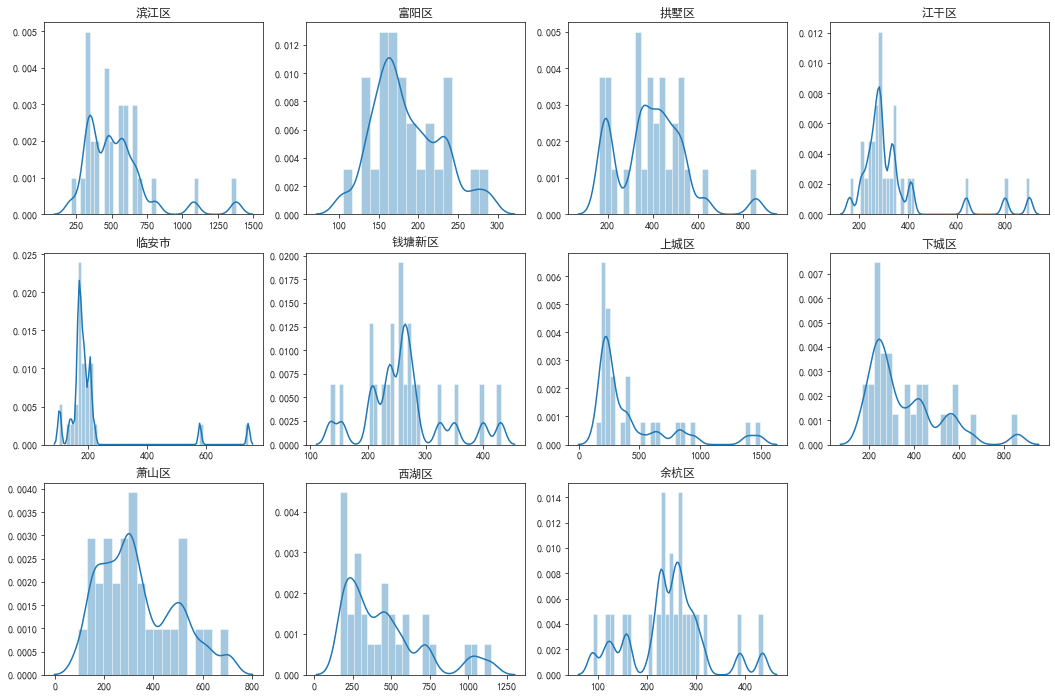

In [41]:
plt.figure(figsize=(18,12))
with sns.axes_style('ticks'):
    for i in range(len(locations)):
        temp = df[df['District'] == locations[i]]
        plt.subplot(3,4,i+1)
        plt.title(locations[i])
        sns.distplot(temp['totalPrice'])
        plt.xlabel('')
plt.show()

Text(0, 0.5, '总价/万元')

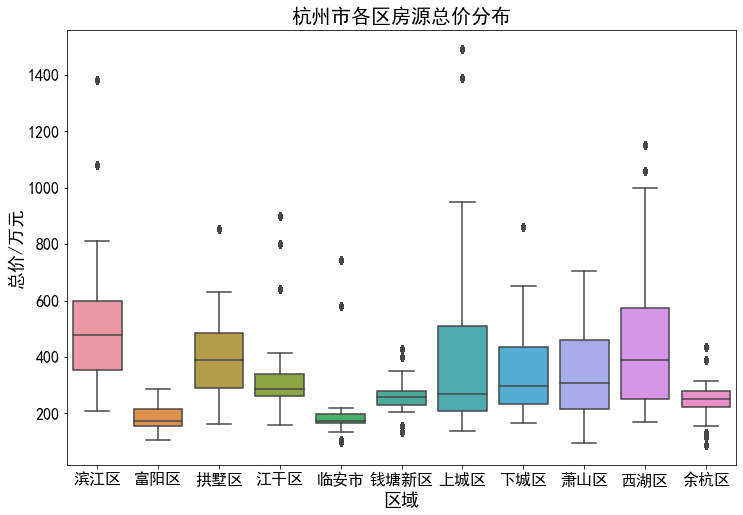

In [42]:
plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)
axbox1 = sns.boxplot(x='District', y='totalPrice', data=df,)
axbox1.set_title('杭州市各区房源总价分布', fontsize=20)
axbox1.set_xlabel('区域', fontsize=18)
axbox1.set_ylabel('总价/万元', fontsize=18)

#### 杭州市各区房源平均单价对比

In [43]:
ave_district = df.groupby('District')['unitPrice'].mean().sort_values(ascending=False).reset_index()

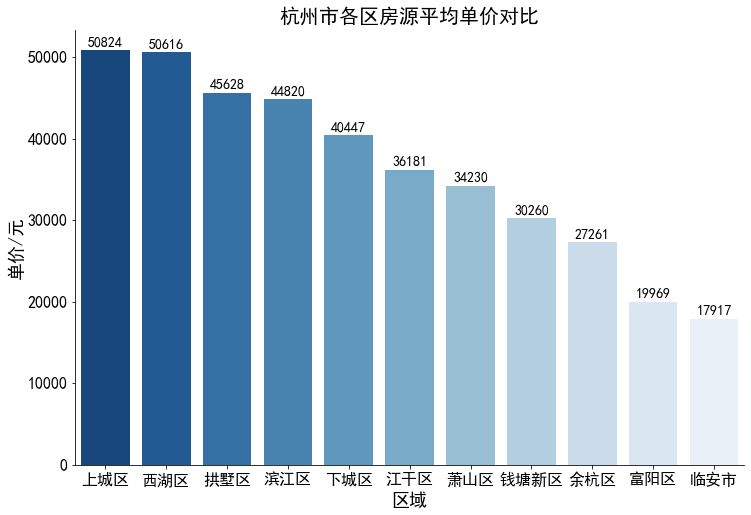

In [44]:
plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)
ax2 = sns.barplot(x='District', y='unitPrice', data=ave_district, palette='Blues_r')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('杭州市各区房源平均单价对比', fontsize=20)
ax2.set_xlabel('区域', fontsize=18)
ax2.set_ylabel('单价/元', fontsize=18)
for index, row in ave_district.iterrows():
    ax2.text(row.name, row.unitPrice+500, round(row.unitPrice), ha='center', fontsize=14)

In [45]:
pair2 = [(row.District,round(row.unitPrice,2)) for index, row in ave_district.iterrows()]

In [46]:
pair2

[('上城区', 50824.0),
 ('西湖区', 50615.87),
 ('拱墅区', 45628.3),
 ('滨江区', 44820.4),
 ('下城区', 40446.97),
 ('江干区', 36181.21),
 ('萧山区', 34229.71),
 ('钱塘新区', 30259.76),
 ('余杭区', 27260.67),
 ('富阳区', 19968.56),
 ('临安市', 17916.69)]

In [47]:
map2 = Map(init_opts=opts.InitOpts(theme='vintage', width='800px', height='400px'))
map2.add('杭州', pair2, '杭州', is_roam=False)
map2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map2.set_global_opts(
        title_opts = opts.TitleOpts(title='杭州市各区房源平均单价对比'),
        legend_opts = opts.LegendOpts(is_show=False),
        visualmap_opts = opts.VisualMapOpts(min_=round(ave_district['unitPrice'].min()), max_=round(ave_district['unitPrice'].max())),
        tooltip_opts = opts.TooltipOpts(formatter='{b}: {c}元')
)
map2.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


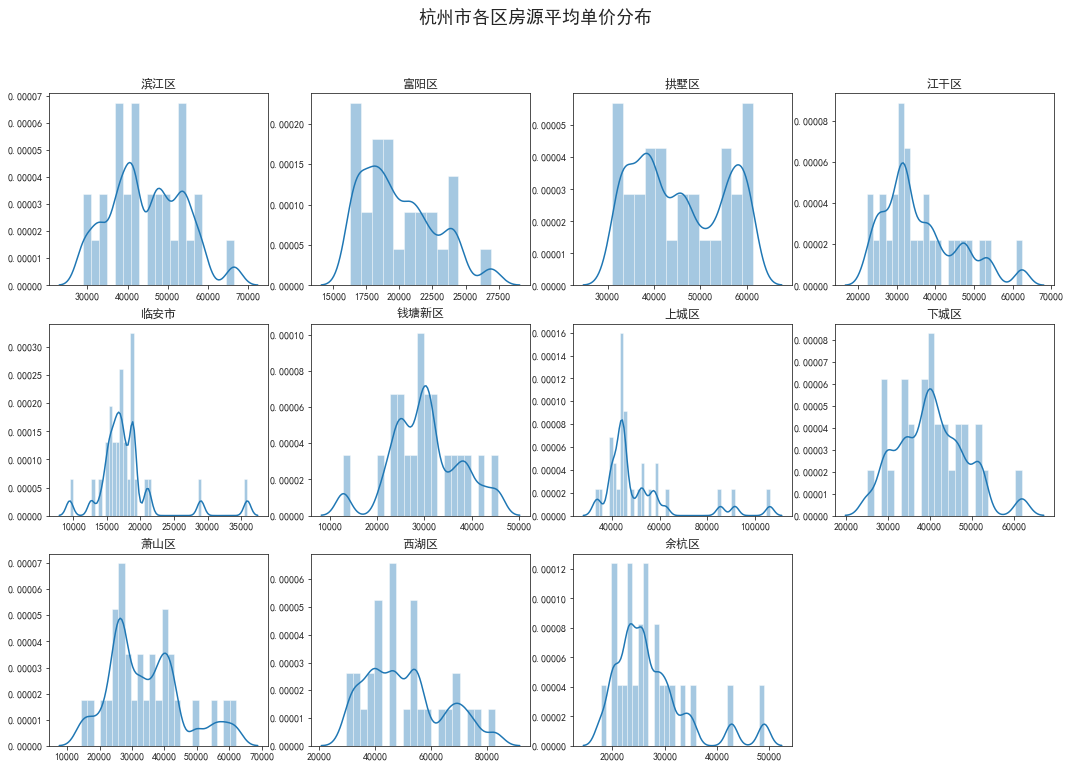

In [48]:
plt.figure(figsize=(18, 12))
with sns.axes_style('ticks'):
    for i in range(len(locations)):
        temp = df[df['District'] == locations[i]]
        plt.subplot(3,4, i+1)
        plt.title(locations[i])
        sns.distplot(temp['unitPrice'])
        plt.xlabel('')
        plt.suptitle('杭州市各区房源平均单价分布', fontsize=18)

plt.show()

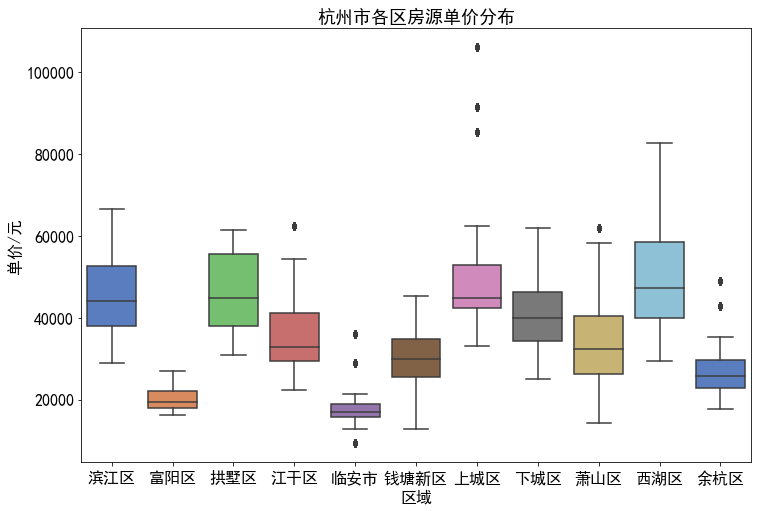

In [150]:
plt.figure(figsize=(12, 8))
plt.tick_params(labelsize=16)
axbox2 = sns.boxplot(x='District', y='unitPrice', data=df, palette=sns.color_palette('muted'))
axbox2.set_xlabel('区域', fontsize=16)
axbox2.set_ylabel('单价/元', fontsize=16)
axbox2.set_title('杭州市各区房源单价分布', fontsize=18)
plt.show()

#### 杭州市各区房源关注度对比

In [49]:
follow_district = df.groupby('District')['Follow'].sum().sort_values(ascending=False).reset_index()

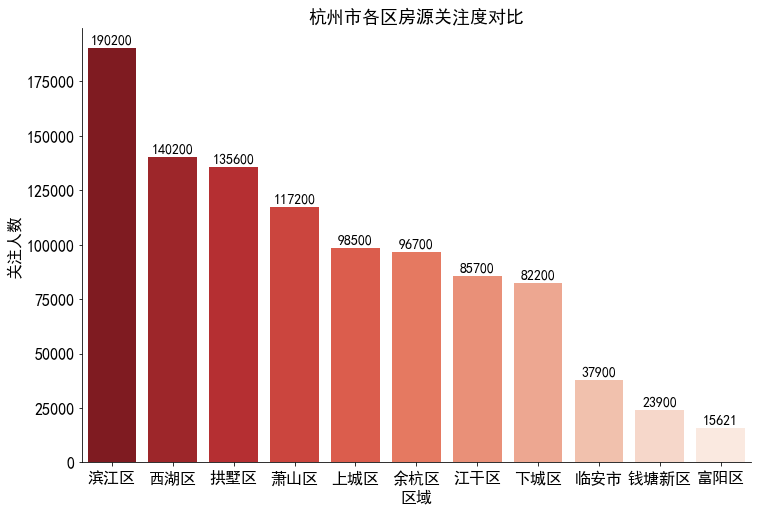

In [50]:
plt.figure(figsize=(12, 8))
plt.tick_params(labelsize=16)
ax3 = sns.barplot(x='District', y='Follow', data=follow_district, palette='Reds_r')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_title('杭州市各区房源关注度对比', fontsize=18)
ax3.set_ylabel('关注人数', fontsize=16)
ax3.set_xlabel('区域', fontsize=16)
for index, row in follow_district.iterrows():
    ax3.text(row.name, row['Follow']+ 2000, row['Follow'], ha='center', fontsize=14)

In [51]:
pair3 = [(row['District'], row['Follow']) for index, row in follow_district.iterrows()]

In [52]:
# map3 = Map(init_opts=opts.InitOpts(theme='macarons', width='800px', height='400px'))
# map3.add('杭州', pair3, '杭州', is_roam=False)
# map3.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
# map3.set_global_opts(
#         title_opts = opts.TitleOpts(title='杭州市各区房源关注度对比'),
#         legend_opts = opts.LegendOpts(is_show=False),
#         visualmap_opts = opts.VisualMapOpts(min_=follow_district['Follow'].min(), max_=follow_district['Follow'].max()),
#         tooltip_opts = opts.TooltipOpts(formatter='{b}: {c}')
# )
# map3.render_notebook()
map3 = Map(init_opts=opts.InitOpts(theme='macarons', width='800px', height='400px'))
map3.add('杭州', pair2, '杭州', is_roam=False)
map3.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map3.set_global_opts(
        title_opts = opts.TitleOpts(title='杭州市各区房源平均单价对比'),
        legend_opts = opts.LegendOpts(is_show=False),
        visualmap_opts = opts.VisualMapOpts(min_=round(follow_district['Follow'].min()), max_=round(follow_district['Follow'].max())),
        tooltip_opts = opts.TooltipOpts(formatter='{b}: {c}元')
)
map3.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [53]:
df['Layout'] = df['Room'].astype('str')+'室'+df['Hall'].astype('str')+'厅'

In [54]:
df['Layout'].unique()

array(['4室2厅', '2室2厅', '3室2厅', '3室1厅', '5室2厅', '2室1厅', '4室1厅', '1室1厅',
       '6室2厅', '1室2厅', '1室0厅', '2室0厅', '5室1厅'], dtype=object)

In [55]:
layout_follow = df.groupby('Layout')['Follow'].sum().sort_values(ascending=False).reset_index()

In [56]:
# head_layout = layout_follow['Layout'].head(13).to_list()
# head_follow = layout_follow['Follow'].head(13).to_list()
# color_series = ['#C9DA36','#9ECB3C','#6DBC49',
#                 '#3DBA78','#14ADCF','#209AC9',
#                 '#2C6BA0','#2D3D8E','#6A368B'
#                 '#7D3990',]
# pie = Pie(init_opts=opts.InitOpts(width='800px', height='450px'))
# pie.set_colors(color_series)
# pie.add("", [list(z) for z in zip(head_layout, head_follow)],
#         radius=['30%', '135%'],
#         center=['50%', '65%'],
#         rosetype='area'
#        )
# pie.set_global_opts(title_opts=opts.TitleOpts(title='杭州', subtitle='各个'),
#                     legend_opts=opts.LegendOpts(is_show=False),
#                     toolbox_opts=opts.ToolboxOpts()
#                    )
# pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='insize', font_size=12,
#                                               formatter='{b}:{c}', font_style='italic'))
# pie.render_notebook()

In [57]:
bar1 = Bar(init_opts=opts.InitOpts(theme='wonderland', width='800px', height='600px'))
bar1.add_xaxis(layout_follow['Layout'].head(10).to_list())
bar1.add_yaxis("", layout_follow['Follow'].head(10).to_list())
bar1.set_global_opts(title_opts=opts.TitleOpts(title='杭州市房源关注度TOP10', pos_left='center'))
# bar1.reversal_axis()
bar1.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [58]:
ori_follow = df.groupby('Orientation')['Follow'].sum().sort_values(ascending=False).reset_index()

In [59]:
ori_follow

,Orientation,Follow
0,南,886493
1,东,75700
2,西,49100
3,东南,9328
4,西南,2400
5,北,400
6,西北,300


In [60]:
pie = Pie(init_opts=opts.InitOpts(width='800px', height='450px', theme='light'))
pie.add("", [list(z) for z in zip(ori_follow['Orientation'], ori_follow['Follow'])],
        radius=['35%', '75%'],
       )
pie.set_global_opts(title_opts=opts.TitleOpts(title='不同朝向关注度对比'),
                    legend_opts=opts.LegendOpts(is_show=True),
                    toolbox_opts=opts.ToolboxOpts(is_show=False)
                   )
pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True,  font_size=12,
                                              formatter='{b}:{c}'))
pie.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [67]:
cut_range = [x for x in  range(0,46, 5)]

In [68]:
cut_name = [str(cut_range[i]) + '-' + str(cut_range[i+1]) + '层'  for i in range(9)]

In [70]:
cut_name

['0-5层',
 '5-10层',
 '10-15层',
 '15-20层',
 '20-25层',
 '25-30层',
 '30-35层',
 '35-40层',
 '40-45层']

In [71]:
df['floorRange'] = pd.cut(df['totalFloor'], cut_range, labels=cut_name)

In [72]:
floor_follow = df.groupby('floorRange')['Follow'].sum().sort_values(ascending=False).reset_index()

In [73]:
bar2 = Bar(init_opts=opts.InitOpts(theme='vintage', width='600px', height='400px'))
bar2.add_xaxis(floor_follow['floorRange'].to_list())
bar2.add_yaxis("关注度", floor_follow['Follow'].to_list())
bar2.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
bar2.set_global_opts(title_opts=opts.TitleOpts(title='不同楼层关注度'), 
                     xaxis_opts=opts.AxisOpts(axislabel_opts={'rotate': 45,}))
bar2.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [74]:
reno_follow = df.groupby('Renovation')['Follow'].sum().sort_values(ascending=False).reset_index()

In [75]:
bar3 = Bar(init_opts=opts.InitOpts(theme='roma', width='700px', height='300px'))
bar3.add_xaxis(reno_follow['Renovation'].to_list())
bar3.add_yaxis("装修情况", reno_follow['Follow'].to_list())
bar3.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
bar3.set_global_opts(title_opts=opts.TitleOpts('装修情况对关注度的影响'), 
                     xaxis_opts=opts.AxisOpts(axislabel_opts={'interval':"0"}))

bar3.reversal_axis()
bar3.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [85]:
size_district = df.groupby('District')['Size'].mean().sort_values(ascending=True).reset_index()

In [102]:
bar3 = Bar(init_opts=opts.InitOpts(theme='vintage', width='800px', height='600px'))
bar3.add_xaxis(size_district['District'].to_list())
bar3.add_yaxis("平均面积", round(size_district['Size'],2).to_list())
bar3.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='right'))
bar3.set_global_opts(title_opts=opts.TitleOpts("杭州市各区房源平均面积对比"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts={'interval': "0"}))

bar3.reversal_axis()
bar3.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


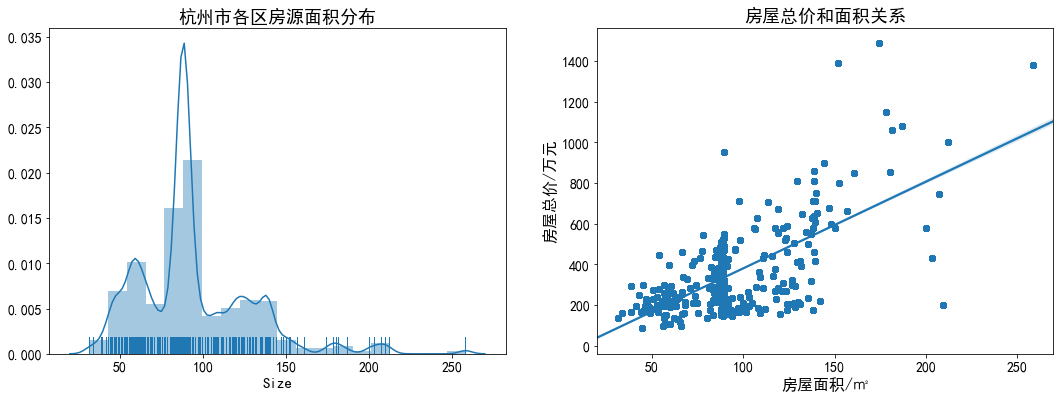

In [142]:
f,[ax1, ax2] = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df['Size'],ax=ax1, rug=True, bins=20)
ax1.set_title('杭州市各区房源面积分布', fontsize=18)
ax1.tick_params(labelsize=14)
sns.regplot(x='Size', y='totalPrice', data=df, ax=ax2)
ax2.set_title('房屋总价和面积关系', fontsize=18)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('房屋面积/㎡', fontsize=16)
ax2.set_ylabel('房屋总价/万元', fontsize=16)
plt.show()